# 1000 ML Graduation Project
## Team
* X1837
* X2458
* X1623
### Tasks
* Data Reading & Analysis [Done]
* Data Cleaning  [Done]
* Visualization  [Done]
* Building the Model  [Done]
* Model Evaluation  [Done]

## Data Reading & Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Checking null values!

In [5]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
data.shape

(319795, 18)

In [7]:
# numarical data
data.select_dtypes('number').describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### looking at BMI Distribution

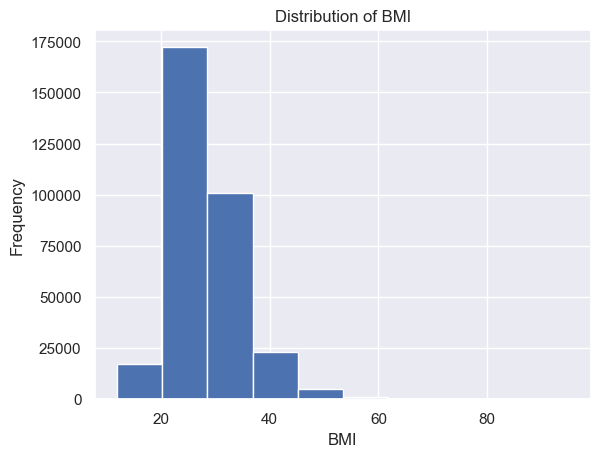

In [8]:
data['BMI'].hist()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI');

### lokking at PhysicalHealth Distribution

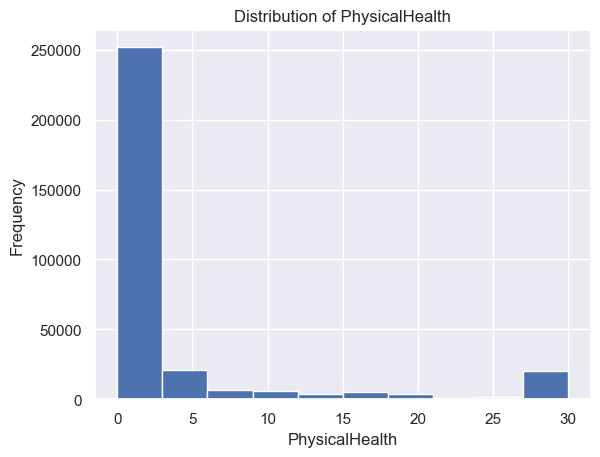

In [9]:
data['PhysicalHealth'].hist()
plt.xlabel('PhysicalHealth')
plt.ylabel('Frequency')
plt.title('Distribution of PhysicalHealth');

### Looking at MentalHealth Distribution

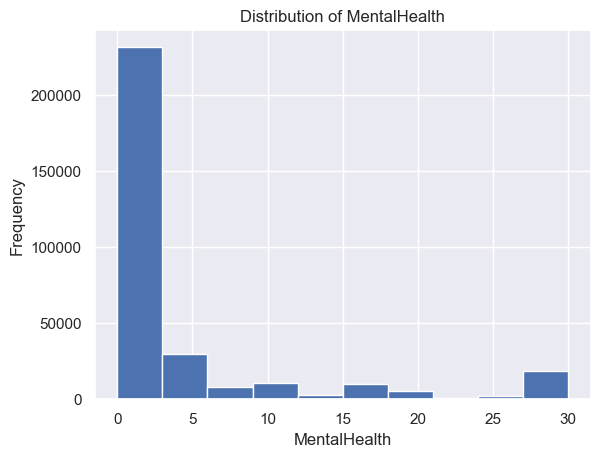

In [10]:
data['MentalHealth'].hist()
plt.xlabel('MentalHealth')
plt.ylabel('Frequency')
plt.title('Distribution of MentalHealth');

### Looking at Sleep Time Distribution

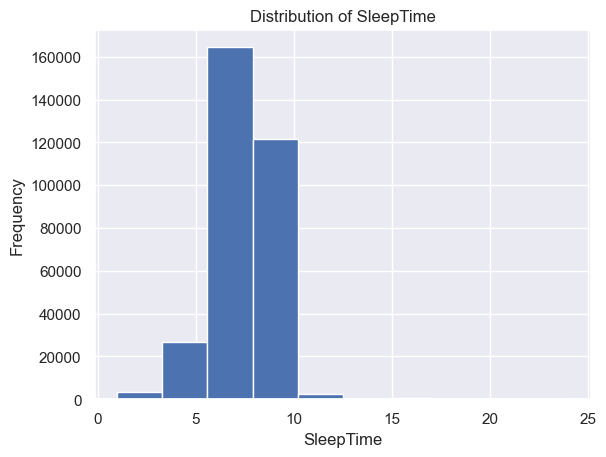

In [11]:
data['SleepTime'].hist()
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.title('Distribution of SleepTime');


### is there a dependency in data?

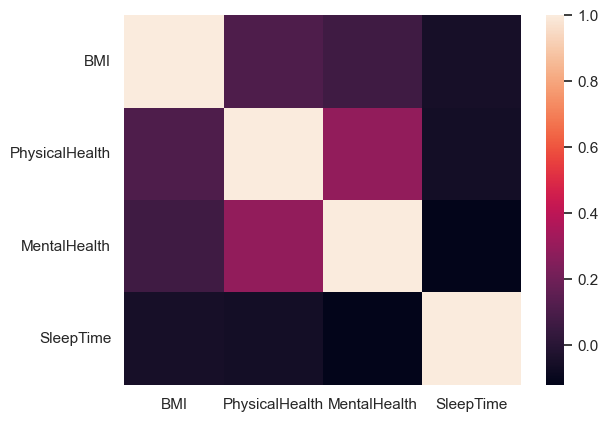

In [12]:
corr=data.select_dtypes('number').corr()
sns.heatmap(corr);

data isn't highly corrlated with eath other

## Working with Categorical data

In [13]:
data_cat = data.select_dtypes('object')
print(data_cat.head())
print(data_cat.nunique())

  HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   

   AgeCategory   Race Diabetic PhysicalActivity  GenHealth Asthma  \
0        55-59  White      Yes              Yes  Very good    Yes   
1  80 or older  White       No              Yes  Very good     No   
2        65-69  White      Yes              Yes       Fair    Yes   
3        75-79  White       No               No       Good     No   
4        40-44  White       No              Yes  Very good     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         N

In [14]:
# Converting Categorical Data to Numerical Data
data =  data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
data['Diabetic'] = data['Diabetic'].astype(int)

In [15]:
data_cat = data.select_dtypes('object')
print(data_cat.head())
print(data_cat.nunique())

   AgeCategory   Race  GenHealth
0        55-59  White  Very good
1  80 or older  White  Very good
2        65-69  White       Fair
3        75-79  White       Good
4        40-44  White  Very good
AgeCategory    13
Race            6
GenHealth       5
dtype: int64


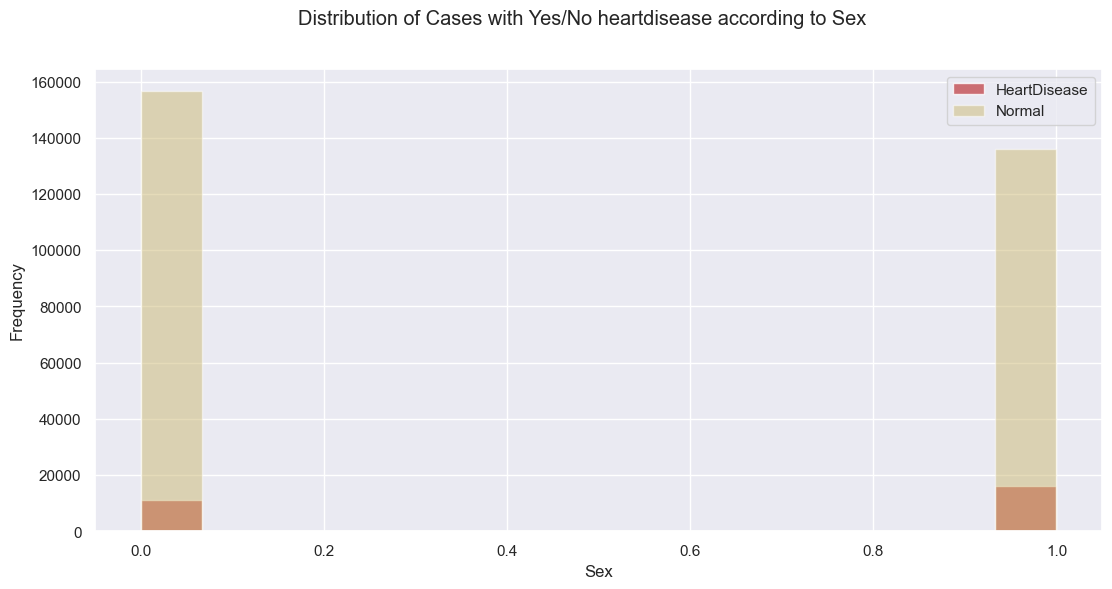

In [16]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["Sex"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

1 refers to men and 0 refers to women
Most cases of heart disease are men .
Most cases that got no hart disease are women 

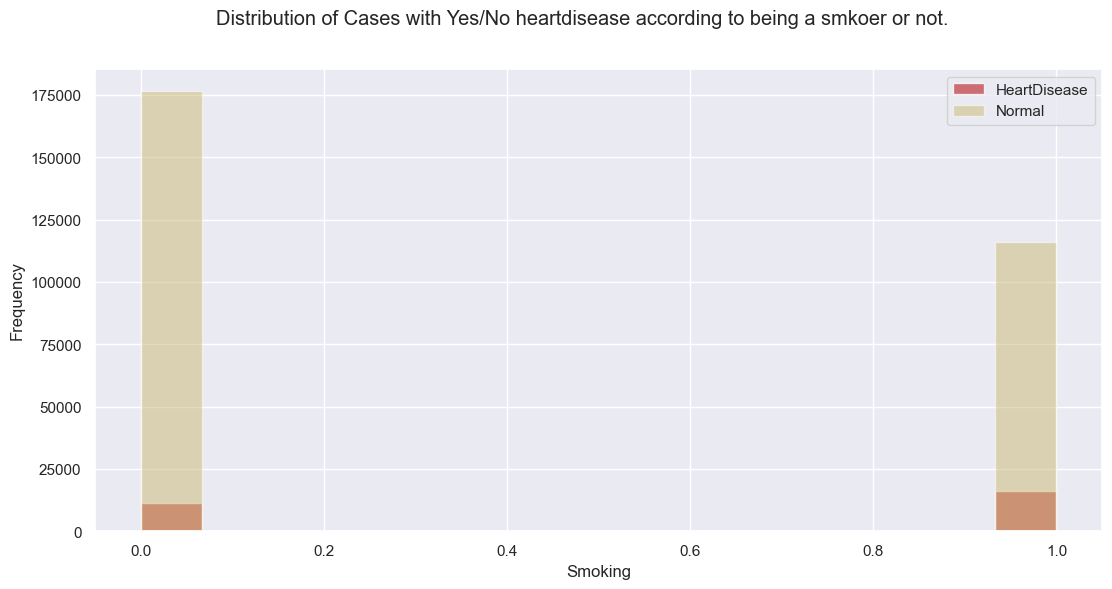

In [17]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["Smoking"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["Smoking"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to being a smkoer or not.")

ax.legend();

For smokers, they are the largest group that suffers from heart disease.
There are also cases of heart disease, although they don't smoke, this is related to other factors.

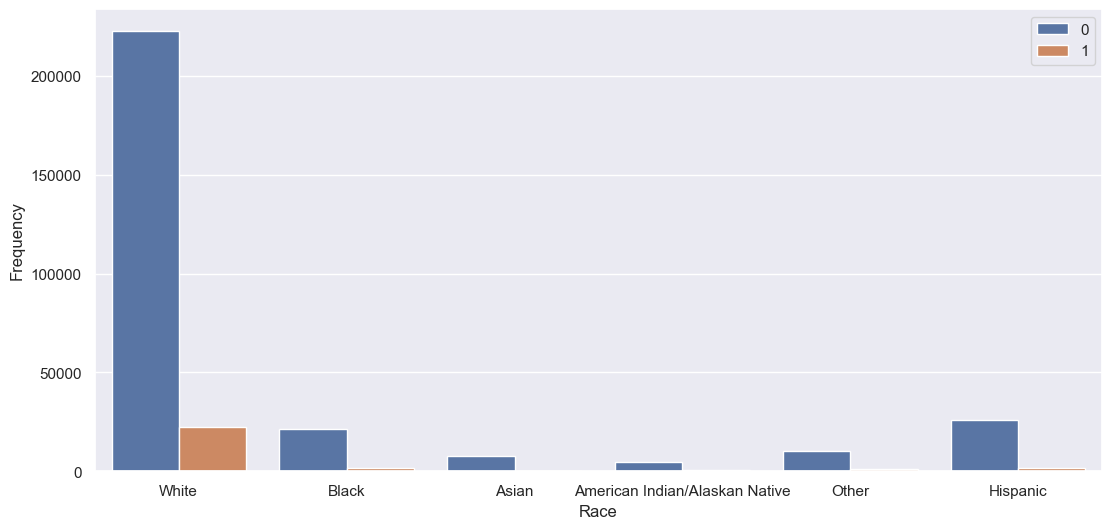

In [18]:
plt.figure(figsize = (13,6))
sns.countplot( x= data['Race'], hue = 'HeartDisease', data = data)
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

1 refers to heartdisease.
0 refers to normal state.
We can see that white people are more susceptible to heart disease

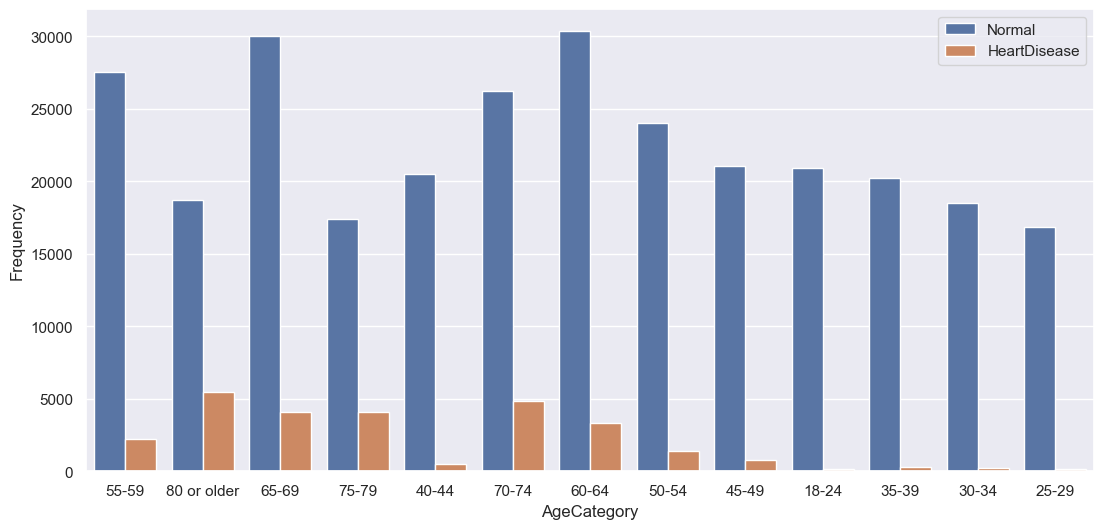

In [19]:
plt.figure(figsize = (13,6))
sns.countplot(x = data['AgeCategory'], hue = 'HeartDisease', data = data)
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

We can see that people who are 80 or older are more likely to get HeartDiseases.


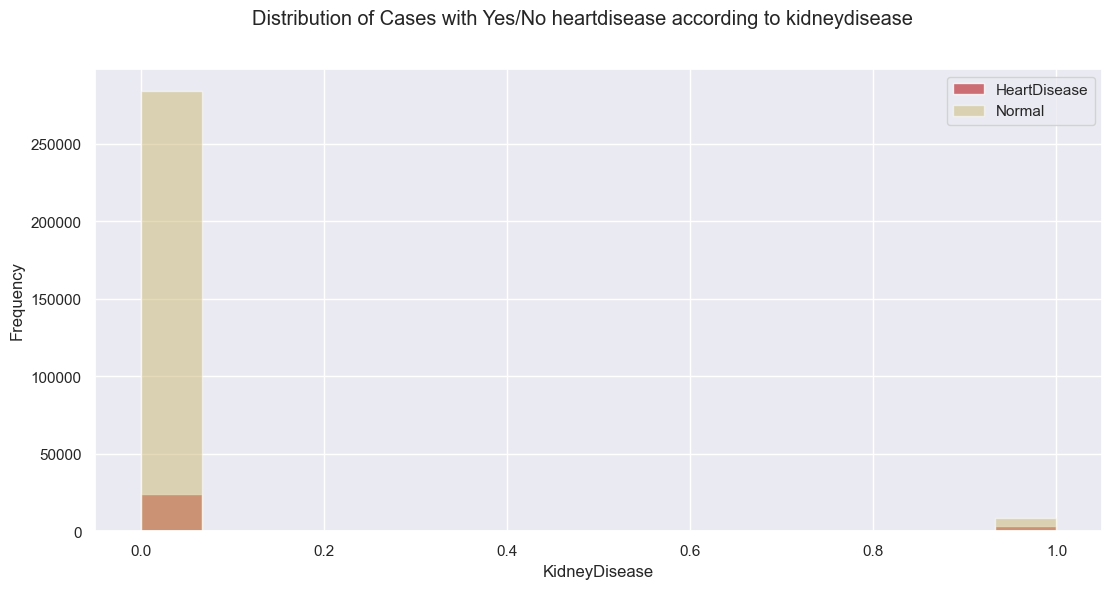

In [20]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

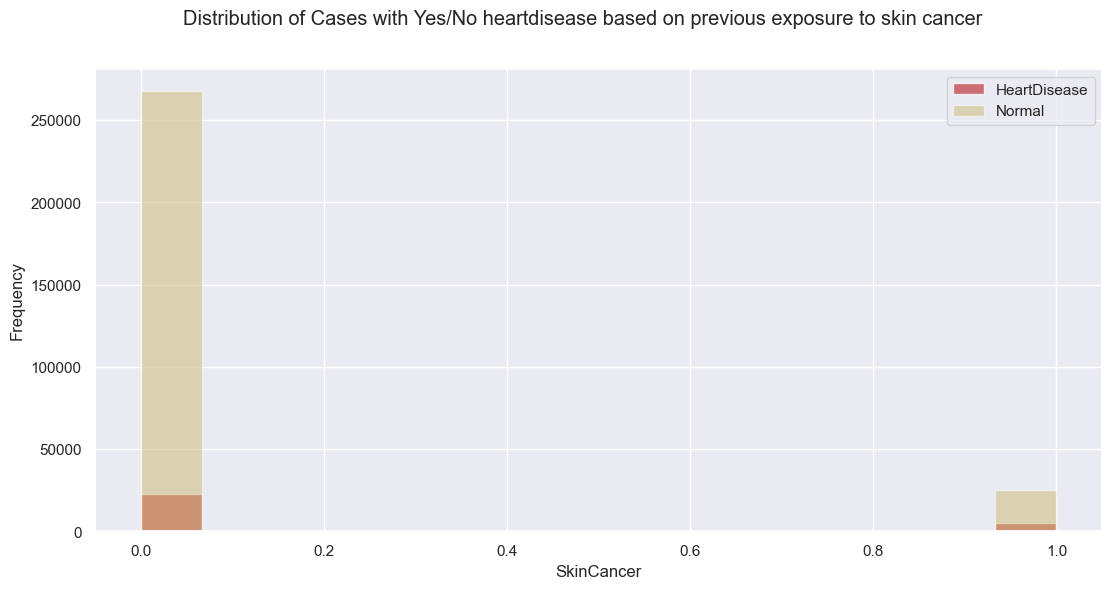

In [21]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

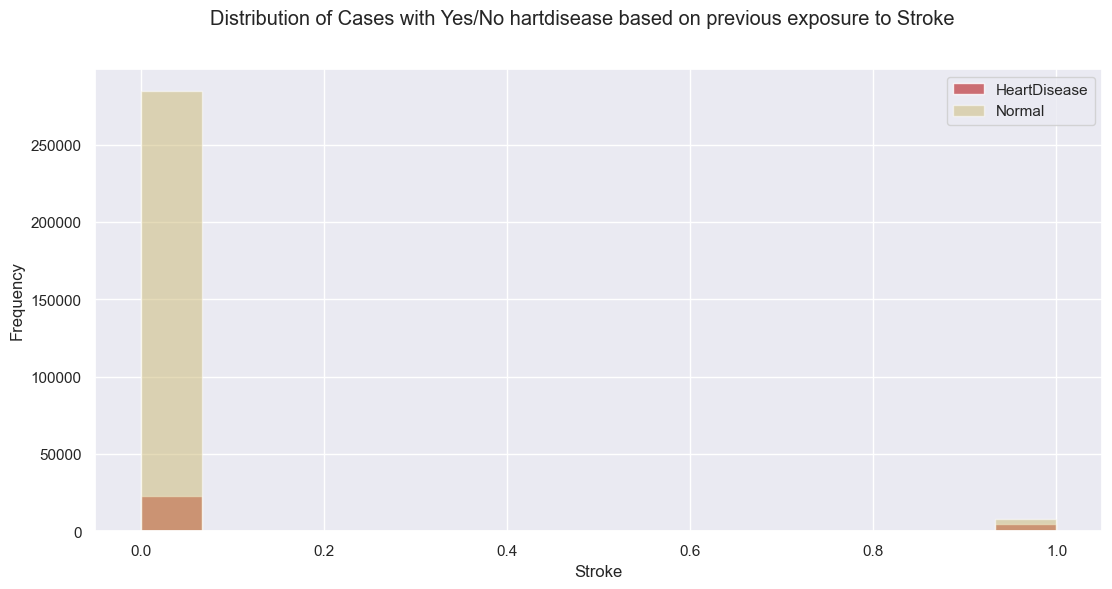

In [22]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

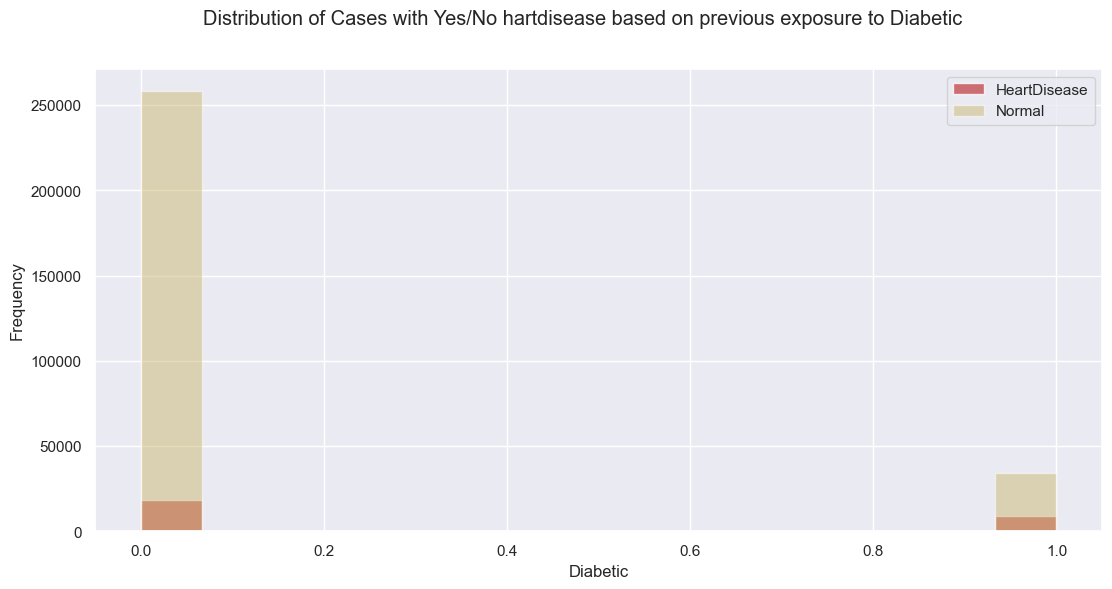

In [23]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["Diabetic"], bins=15, alpha=0.8, color="r", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["Diabetic"], bins=15, alpha=0.5, color="y", label="Normal")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic")

ax.legend();

## Building & Evaluating the model
as we Noticed, we have Categorical Data and we are aiming to use RandomForestClassifier in SkLearn as Machine Learning Model 

**First**
We have to split the data to Training & Testing using SKLearn

In [24]:
from sklearn.model_selection import train_test_split

#Select Features
# Inputs Axis
features = data.drop(columns =['HeartDisease'], axis = 1) # Droping Columne

#Select Target
# Outputs 
target = data['HeartDisease']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [25]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
213522,30.90,0,1,0,0.0,0.0,0,0,45-49,White,0,1,Very good,9.0,0,0,0
124144,29.44,1,1,0,0.0,0.0,0,0,60-64,White,0,0,Good,6.0,0,0,0
230019,20.60,0,0,0,0.0,0.0,0,0,40-44,White,0,1,Excellent,8.0,0,0,0
209955,23.11,1,0,1,0.0,11.0,0,1,25-29,White,0,1,Fair,8.0,0,0,0
165246,35.26,1,0,0,0.0,0.0,0,1,30-34,White,0,0,Good,7.0,0,0,0


**Second** 
Training our model Using Random Forest Classifier
After a lot of Testing, we found 100 n_estimator is pretty Good

In [26]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    RandomForestClassifier(n_estimators=100)
)

model.fit(X_train , y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestclassifier', RandomForestClassifier())])

Testing our model on Testing Data Then Calculating the Accurecy Using **Metrics** in SKLearn

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **Great**
The Accurecy Score of our Model is 91%

In [29]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
print('accuracy for model is:',acc)
print('f1 for model is:',f1)
print('confusion_matrix for model is:\n',cm)

accuracy for model is: 0.912944229897278
f1 for model is: 0.09698345767109959
confusion_matrix for model is:
 [[58092   421]
 [ 5147   299]]
